In [3]:
import time

In [4]:
def func(i):
    time.sleep(0.2)
    return i

In [5]:
def loop(n):
    results = []
    for i in range(n):
        r = func(i)
        results.append(r)
    return results

In [6]:
loop(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
def gene_func():
    yield 1
    yield 2
    yield 3

In [8]:
for i in gene_func():
    print (i)

1
2
3


In [9]:
g = gene_func()

In [10]:
next(g)

1

In [11]:
next(g)

2

In [12]:
next(g)

3

In [13]:
next(g)

StopIteration: 

In [14]:
def loop_with_gene(n):
    for i in range(n):
        r= func(i)
        yield r

In [15]:
for i in loop_with_gene(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [16]:
for i in loop(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [17]:
import pandas as pd


In [19]:
content = pd.read_csv('./train.csv')


In [25]:
content[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
ages = content['Age'].tolist()

In [26]:
fares = content['Fare'].tolist()

In [21]:
import matplotlib.pyplot as plt


In [22]:
%matplotlib inline

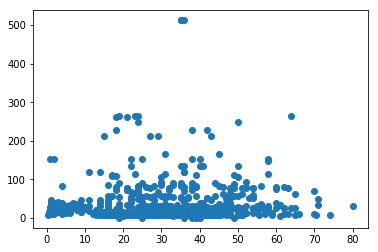

In [27]:
plt.scatter(ages, fares)

In [33]:
age_with_fares = content[
    (content['Age'] > 22 ) & (content['Fare']<400) & (content['Fare']>130)
]

In [34]:
sub_fare = age_with_fares['Fare'].tolist()
sub_age = age_with_fares['Age'].tolist()


In [36]:
sub_age[:10]


[23.0, 24.0, 58.0, 58.0, 35.0, 50.0, 31.0, 40.0, 36.0, 38.0]

In [37]:
sub_fare[:10]

[263.0,
 247.5208,
 146.5208,
 153.4625,
 135.6333,
 247.5208,
 164.8667,
 134.5,
 135.6333,
 153.4625]

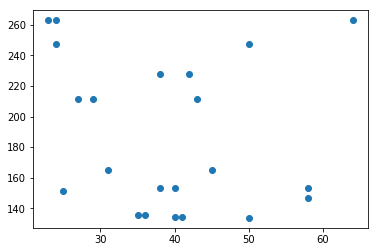

In [38]:
plt.scatter(sub_age, sub_fare)

### Todo : get the sub-bin's fare

# 2. An Example for Best First Search with Map Data

In [1]:
import matplotlib
print(matplotlib.__path__)

['/home/lc/anaconda3/lib/python3.6/site-packages/matplotlib']


In [2]:
coordinations_chinese = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
import re

city_location = {}

for line in coordinations_chinese.split('\n'):
    if line.startswith('//'): continue # leave out cities not in mainland
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]

    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)


兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [4]:
import math

In [5]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [7]:
get_city_distance('杭州', '上海')

153.5185697155768

In [8]:
import networkx as nx

In [9]:
cities = list(city_location.keys())

In [10]:
city_graph = nx.Graph()

In [11]:
city_graph.add_nodes_from(cities)

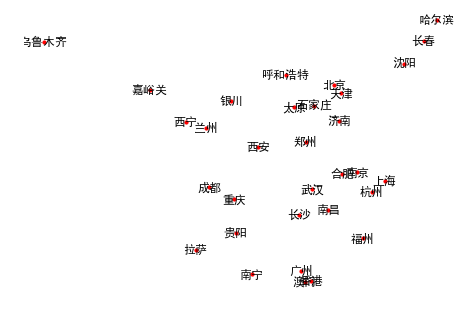

In [13]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [14]:
threshold = 700

In [15]:
from collections import defaultdict

In [16]:
cities_connection = defaultdict(list)

In [17]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold: 
            cities_connection[c1].append(c2)

In [19]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [66]:
cities_connection_graph = nx.Graph(cities_connection)


In [70]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [75]:
# cities_connection
# [cities_connection[v] for v in city_location]

NetworkXError: Node 'lanzhou' has no position.

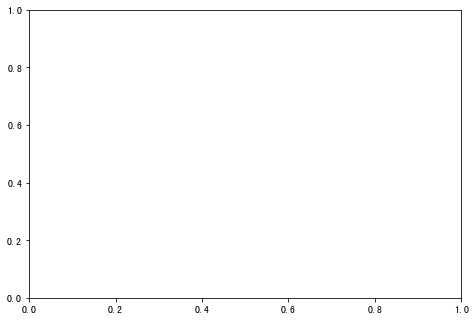

In [73]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [27]:
coordination_source = """
{name:'lanzhou', geoCoord:[103.73, 36.03]},
{name:'jiayuguan', geoCoord:[98.17, 39.47]},
{name:'xining', geoCoord:[101.74, 36.56]},
{name:'chengdu', geoCoord:[104.06, 30.67]},
{name:'shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'lasa', geoCoord:[102.73, 25.04]},
{name:'guiyang', geoCoord:[106.71, 26.57]},
{name:'wuhan', geoCoord:[114.31, 30.52]},
{name:'zhengzhou', geoCoord:[113.65, 34.76]},
{name:'jinan', geoCoord:[117, 36.65]},
{name:'nanjing', geoCoord:[118.78, 32.04]},
{name:'hefei', geoCoord:[117.27, 31.86]},
{name:'hangzhou', geoCoord:[120.19, 30.26]},
{name:'nanchang', geoCoord:[115.89, 28.68]},
{name:'fuzhou', geoCoord:[119.3, 26.08]},
{name:'guangzhou', geoCoord:[113.23, 23.16]},
{name:'changsha', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'shengyang', geoCoord:[123.38, 41.8]},
{name:'changchun', geoCoord:[125.35, 43.88]},
{name:'haorbing', geoCoord:[126.63, 45.75]},
{name:'taiyuan', geoCoord:[112.53, 37.87]},
{name:'xian', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'beijing', geoCoord:[116.46, 39.92]},
{name:'shanghai', geoCoord:[121.48, 31.22]},
{name:'chongqing', geoCoord:[106.54, 29.59]},
{name:'tianjing', geoCoord:[117.2, 39.13]},
{name:'huhehaote', geoCoord:[111.65, 40.82]},
{name:'nanning', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'yinchuan', geoCoord:[106.27, 38.47]},
{name:'wulumuqi', geoCoord:[87.68, 43.77]},
{name:'xiangang', geoCoord:[114.17, 22.28]},
{name:'aomen', geoCoord:[113.54, 22.19]}
"""

In [50]:
city_location_en = {}

for line in coordination_source.split('\n'):
    if line.startswith('//'): continue # leave out cities not in mainland
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]

    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location_en[city] = x_y
    print(city, x_y)

lanzhou (103.73, 36.03)
jiayuguan (98.17, 39.47)
xining (101.74, 36.56)
chengdu (104.06, 30.67)
shijiazhuang (114.48, 38.03)
lasa (102.73, 25.04)
guiyang (106.71, 26.57)
wuhan (114.31, 30.52)
zhengzhou (113.65, 34.76)
jinan (117.0, 36.65)
nanjing (118.78, 32.04)
hefei (117.27, 31.86)
hangzhou (120.19, 30.26)
nanchang (115.89, 28.68)
fuzhou (119.3, 26.08)
guangzhou (113.23, 23.16)
changsha (113.0, 28.21)
shengyang (123.38, 41.8)
changchun (125.35, 43.88)
haorbing (126.63, 45.75)
taiyuan (112.53, 37.87)
xian (108.95, 34.27)
beijing (116.46, 39.92)
shanghai (121.48, 31.22)
chongqing (106.54, 29.59)
tianjing (117.2, 39.13)
huhehaote (111.65, 40.82)
nanning (108.33, 22.84)
yinchuan (106.27, 38.47)
wulumuqi (87.68, 43.77)
xiangang (114.17, 22.28)
aomen (113.54, 22.19)


In [51]:
cities_connection_en = defaultdict(list)

In [52]:
cities_en = list(city_location_en.keys())

In [53]:
cities_en

['lanzhou',
 'jiayuguan',
 'xining',
 'chengdu',
 'shijiazhuang',
 'lasa',
 'guiyang',
 'wuhan',
 'zhengzhou',
 'jinan',
 'nanjing',
 'hefei',
 'hangzhou',
 'nanchang',
 'fuzhou',
 'guangzhou',
 'changsha',
 'shengyang',
 'changchun',
 'haorbing',
 'taiyuan',
 'xian',
 'beijing',
 'shanghai',
 'chongqing',
 'tianjing',
 'huhehaote',
 'nanning',
 'yinchuan',
 'wulumuqi',
 'xiangang',
 'aomen']

In [55]:
def get_city_distance_en(city1, city2):
    return geo_distance(city_location_en[city1], city_location_en[city2])

In [57]:
for c1 in cities_en:
    for c2 in cities_en:
        if c1 == c2: continue
        
        if get_city_distance_en(c1, c2) < threshold: 
            cities_connection_en[c1].append(c2)

In [58]:
cities_connection_graph_en = nx.Graph(cities_connection_en)

In [60]:
# cities_connection_en

/home/lc/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


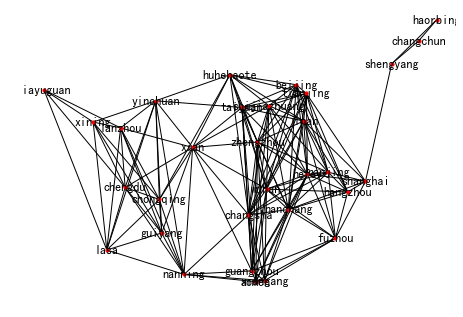

In [61]:
nx.draw(cities_connection_graph_en, city_location_en, with_labels=True, node_size=10)

In [76]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [77]:
is_goal(['xian', 'lanzhou'], 'lanzhou')

TypeError: is_goal() takes 1 positional argument but 2 were given

In [138]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
        
#         print('froniter:', froniter)
        successors = graph[froniter]
#         print('successors:', successors)
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#         print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [143]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_path_distance, beam=20))

In [144]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_path_distance, beam=30))

['beijing', 'wuhan', 'changsha', 'nanning', 'lasa']

In [145]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_path_distance, beam=25))

['beijing', 'wuhan', 'changsha', 'xian', 'chongqing', 'lasa']

In [156]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_total_station, beam=20))

['beijing',
 'shijiazhuang',
 'guangzhou',
 'fuzhou',
 'xiangang',
 'nanning',
 'lasa']

In [125]:
search(cities_connection_en, start='beijing', is_goal=is_goal('changsha'),
       search_strategy=sort_path(get_total_station))

['beijing', 'changsha']

In [84]:
# search(cities_connection, start='xian', is_goal=is_goal('shanghai'))

In [85]:
# search(cities_connection, 'xian', 'shanghai')

In [81]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [117]:
# search(cities_connection_en, start='beijing', 
#        is_goal=is_goal('lasa'), search_strategy=lambda n: n)

In [92]:
def get_path_distance(path):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance_en(c, path[i+1])
    
    return distance

In [88]:
def get_total_station(path):
    return len(path)

In [89]:
def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)

In [90]:
def get_as_much_path(path): 
    return -1 * len(path)

In [93]:
get_path_distance(['beijing', 'changsha'])

665.2271362574077

In [108]:
get_path_distance(['beijing', 'lasa'])

1612.7137359438252

In [131]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_path_distance, beam=10))

In [127]:
search(cities_connection_en, start='beijing', 
       is_goal=is_goal('lasa'), search_strategy=lambda n: n)

['beijing', 'changsha', 'nanning', 'lasa']

In [130]:
search(cities_connection_en, start='beijing', is_goal=is_goal('lasa'),
       search_strategy=sort_path(get_total_station))

['beijing', 'changsha', 'nanning', 'lasa']

In [132]:
search(cities_connection_en, start='beijing', is_goal=is_goal('lasa'), 
       search_strategy=sort_path(get_as_much_path))

['beijing',
 'shijiazhuang',
 'wuhan',
 'zhengzhou',
 'jinan',
 'nanjing',
 'hefei',
 'hangzhou',
 'nanchang',
 'fuzhou',
 'guangzhou',
 'changsha',
 'taiyuan',
 'xian',
 'lanzhou',
 'lasa']